<a href="https://colab.research.google.com/github/Emutisya/GBFS_UCS/blob/main/imdb_moviesentiment_analysis_using_tensorflow_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have imported the IMDB movie reviews
We vectorized and normalized the data
we compiled a multi layers NN
Monitored the learning and validation curves for loss and accuracy


In [ ]:
# Importing necessary modules
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
 
from keras.datasets import imdb

print(os.getcwd())
print("Modules imported \n")
print("Files available in directory:")
from subprocess import check_output
 # Making sure files are  available in the directory
print(check_output(["ls", "../input"]).decode("utf8"))

Using TensorFlow backend.


/kaggle/working
Modules imported 

Files available in directory:



In [ ]:
# Load imported imdb data

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [ ]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maxvalue of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Max length of number words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maxvalue of a word index 
9999
Max length of number words of review in train 
2494


In [ ]:
# review in words
# Reverse from integers to words

word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[123]])

print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step
? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [ ]:
# vectorize
# Encoding the integer sequences into a binary matrix
#matrix of 10k columns

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [ ]:
# vectorizing the labels 

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [ ]:
# setting a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [ ]:
# nn model

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
#training the model

NumEpochs = 10
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 9s 606us/step - loss: 1.1558 - acc: 0.6286 - val_loss: 0.8060 - val_acc: 0.8060
Epoch 2/10
15000/15000 [==============================] - 2s 121us/step - loss: 0.7839 - acc: 0.7043 - val_loss: 0.7478 - val_acc: 0.7481
Epoch 3/10
15000/15000 [==============================] - 2s 122us/step - loss: 0.7509 - acc: 0.7435 - val_loss: 0.6964 - val_acc: 0.8464
Epoch 4/10
15000/15000 [==============================] - 2s 121us/step - loss: 0.7230 - acc: 0.7749 - val_loss: 0.6972 - val_acc: 0.7901
Epoch 5/10
15000/15000 [==============================] - 2s 121us/step - loss: 0.7020 - acc: 0.7929 - val_loss: 0.6496 - val_acc: 0.8441
Epoch 6/10
15000/15000 [==============================] - 2s 133us/step - loss: 0.6852 - acc: 0.8035 - val_loss: 0.6232 - val_acc: 0.8515
Epoch 7/10
15000/15000 [==============================] - 2s 121us/step - loss: 0.6677 - acc: 0.8150 - val_loss: 0.6057 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

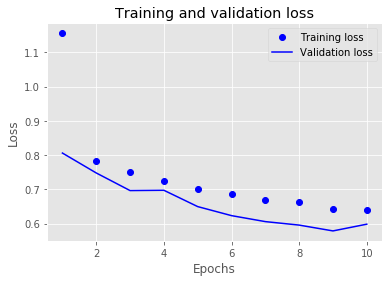

In [ ]:
#checking validation through curve loss
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

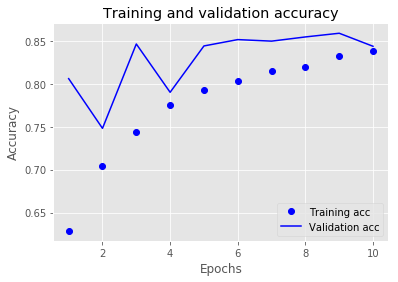

In [ ]:
#validation accuracy curves
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# prediction

model.predict(x_test)

array([[0.27089825],
       [0.9590546 ],
       [0.51789945],
       ...,
       [0.19693434],
       [0.18540573],
       [0.27462798]], dtype=float32)